## Introduction

we'll work with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

The dataset was originally scraped and uploaded to Kaggle.

The data dictionary provided with data is as follows:

* `dateCrawled` - When this ad was first crawled. All field-values are taken from this date.
* `name` - Name of the car.
* `seller` - Whether the seller is private or a dealer.
* `offerType` - The type of listing
* `price` - The price on the ad to sell the car.
* `abtest` - Whether the listing is included in an A/B test.
* `vehicleType` - The vehicle Type.
* `yearOfRegistration` - The year in which the car was first registered.
* `gearbox` - The transmission type.
* `powerPS` - The power of the car in PS.
* `model` - The car model name.
* `kilometer` - How many kilometers the car has driven.
* `monthOfRegistration` - The month in which the car was first registered.
* `fuelType` - What type of fuel the car uses.
* `brand` - The brand of the car.
* `notRepairedDamage` - If the car has a damage which is not yet repaired.
* `dateCreated` - The date on which the eBay listing was created.
* `nrOfPictures` - The number of pictures in the ad.
* `postalCode` - The postal code for the location of the vehicle.
* `lastSeenOnline` - When the crawler saw this ad last online.

In [328]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [242]:
autos = pd.read_csv('autos.csv', encoding='latin-1')

In [243]:
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


In [244]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [245]:
autos.isnull().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5095
yearOfRegistration        0
gearbox                2680
powerPS                   0
model                  2758
odometer                  0
monthOfRegistration       0
fuelType               4482
brand                     0
notRepairedDamage      9829
dateCreated               0
nrOfPictures              0
postalCode                0
lastSeen                  0
dtype: int64

In [246]:
for item in autos.columns[autos.isnull().sum() != 0].tolist():
    print(autos[item].value_counts(dropna=False))
    print('--'*10)

limousine     12859
kleinwagen    10822
kombi          9127
NaN            5095
bus            4093
cabrio         3061
coupe          2537
suv            1986
andere          420
Name: vehicleType, dtype: int64
--------------------
manuell      36993
automatik    10327
NaN           2680
Name: gearbox, dtype: int64
--------------------
golf          4024
andere        3528
3er           2761
NaN           2758
polo          1757
              ... 
kalina           2
i3               1
b_max            1
200              1
rangerover       1
Name: model, Length: 246, dtype: int64
--------------------
benzin     30107
diesel     14567
NaN         4482
lpg          691
cng           75
hybrid        37
andere        22
elektro       19
Name: fuelType, dtype: int64
--------------------
nein    35232
NaN      9829
ja       4939
Name: notRepairedDamage, dtype: int64
--------------------


There are five columns which have missing values: `vehicleType`, `gearbox`, `model`, `fuelType` and `notRepairedDamage`. Column `notRepairedDamage` have nearly 20% missing values, `vehicleType` and `fuelType` have about 10% missing values, others with about 5% missing values.

column `price` should be numeric instead of object, we need to omit the $ sign and convert it to float type.

column `odometer` should be numeric instead of object, we need to omit the km sign and convert it to float type.

## Cleaning Column Names

In [247]:
orig_cols = autos.columns.tolist()

In [248]:
cleaned_cols = ['crawled_date', 'name', 'seller', 'offer_type', 'price', 'ab_test', 'vehicle_type', 
                'registration_year', 'gearbox', 'power_ps', 'model', 'odometer', 'registration_month',
               'fuel_type', 'brand', 'unrepaired_damage', 'ad_created', 'pictures_number', 'postal_code',
               'last_seen']

In [249]:
autos.columns = cleaned_cols

In [250]:
autos.head()

,crawled_date,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,pictures_number,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## Initial Exploration and Cleaning.

As we find in the beginning, the `price` and `odometer` should be converted to numeric values.

In [251]:
autos['price'] = autos['price'].str.replace(',','').apply(lambda x: float(x[1:]))

In [252]:
def covert_odometer(odometer):
    odometer = odometer.replace(',', '')
    odometer = odometer.replace('km', '')
    odometer = float(odometer)
    return odometer

autos['odometer'] = autos['odometer'].apply(covert_odometer)

In [253]:
autos.rename({'odometer': 'odometer_km'}, axis=1, inplace=True)

In [254]:
autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   crawled_date        50000 non-null  object 
 1   name                50000 non-null  object 
 2   seller              50000 non-null  object 
 3   offer_type          50000 non-null  object 
 4   price               50000 non-null  float64
 5   ab_test             50000 non-null  object 
 6   vehicle_type        44905 non-null  object 
 7   registration_year   50000 non-null  int64  
 8   gearbox             47320 non-null  object 
 9   power_ps            50000 non-null  int64  
 10  model               47242 non-null  object 
 11  odometer_km         50000 non-null  float64
 12  registration_month  50000 non-null  int64  
 13  fuel_type           45518 non-null  object 
 14  brand               50000 non-null  object 
 15  unrepaired_damage   40171 non-null  object 
 16  ad_c

,crawled_date,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,pictures_number,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000.0,control,bus,2004,manuell,158,andere,150000.0,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500.0,control,limousine,1997,automatik,286,7er,150000.0,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990.0,test,limousine,2009,manuell,102,golf,70000.0,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350.0,control,kleinwagen,2007,automatik,71,fortwo,70000.0,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350.0,test,kombi,2003,manuell,0,focus,150000.0,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [255]:
autos.describe(include='all')

,crawled_date,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,pictures_number,postal_code,last_seen
count,50000,50000,50000,50000,5.000000e+04,50000,44905,50000.000000,47320,50000.000000,47242,50000.000000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,NaN,2,8,NaN,2,NaN,245,NaN,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-22 09:51:06,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,NaN,25756,12859,NaN,36993,NaN,4024,NaN,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,9.840044e+03,NaN,NaN,2005.073280,NaN,116.355920,NaN,125732.700000,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,4.811044e+05,NaN,NaN,105.712813,NaN,209.216627,NaN,40042.211706,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,1.100000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [256]:
for col in autos.columns:
    print(autos[col].value_counts(dropna=False))
    print('---'*10)

2016-03-22 09:51:06    3
2016-03-16 21:50:53    3
2016-03-12 16:06:22    3
2016-03-29 23:42:13    3
2016-03-23 18:39:34    3
                      ..
2016-03-07 12:55:27    1
2016-03-19 12:51:09    1
2016-03-18 16:47:50    1
2016-03-05 20:40:21    1
2016-03-26 17:39:51    1
Name: crawled_date, Length: 48213, dtype: int64
------------------------------
Ford_Fiesta                                               78
BMW_316i                                                  75
Volkswagen_Golf_1.4                                       75
Volkswagen_Polo                                           72
BMW_318i                                                  72
                                                          ..
Audi_a6_zum_verkaufen                                      1
Ford_Focus_Bastler_Export                                  1
Mitsubishi_Space_Star_1.6_Comfort                          1
Volkswagen_Passat_CC_2.0_TDI_BlueMotion_Technology_DSG     1
Fiat_Barchetta_Wunderschoener_Zustan

From above analysis, we can see column `seller` and `offer_type` have almost only one value. These two columns have no value for us, we can delete these two columns. 

We can also see a lot of `zero` values in `price` column, we need further investigation later.

There is a lot `0` values in `registration_month`, it obviously disobeys common sense, need investiation later.

## Exploring the Odometer and Price Columns

In [257]:
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [258]:
autos['price'].value_counts(normalize=True)

0.0        0.02842
500.0      0.01562
1500.0     0.01468
2500.0     0.01286
1200.0     0.01278
            ...   
6202.0     0.00002
18310.0    0.00002
898.0      0.00002
11240.0    0.00002
789.0      0.00002
Name: price, Length: 2357, dtype: float64

In [259]:
autos[autos['price'] == 0].describe()

,price,registration_year,power_ps,odometer_km,registration_month,pictures_number,postal_code
count,1421.0,1421.000000,1421.000000,1421.000000,1421.000000,1421.0,1421.000000
mean,0.0,2016.022519,87.087262,124588.318086,3.723434,0.0,45244.029557
std,0.0,353.020633,403.768237,47790.874888,4.038051,0.0,26203.716073
min,0.0,1500.000000,0.000000,5000.000000,0.000000,0.0,1109.000000
25%,0.0,1996.000000,0.000000,125000.000000,0.000000,0.0,25718.000000
50%,0.0,2000.000000,75.000000,150000.000000,2.000000,0.0,44329.000000
75%,0.0,2005.000000,121.000000,150000.000000,7.000000,0.0,63322.000000
max,0.0,9999.000000,15016.000000,150000.000000,12.000000,0.0,99955.000000


From above analysis, we can see there are 1421 **zero** values in `price` column which is about 2.84% of the total observation. These zero values are abnormal and are a relativly small proportion, so we decide to remove them.

In [260]:
autos = autos[autos['price'] != 0]

In [261]:
autos['odometer_km'].describe()

count     48579.000000
mean     125766.174685
std       39792.936148
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

There are 75% of the observations above 125000km.

## Exploring the date columns

In [262]:
autos['crawled_date'].str[:10].value_counts(normalize=True).sort_index()

2016-03-05    0.025320
2016-03-06    0.014039
2016-03-07    0.036003
2016-03-08    0.033327
2016-03-09    0.033101
2016-03-10    0.032174
2016-03-11    0.032566
2016-03-12    0.036930
2016-03-13    0.015665
2016-03-14    0.036538
2016-03-15    0.034274
2016-03-16    0.029601
2016-03-17    0.031639
2016-03-18    0.012907
2016-03-19    0.034768
2016-03-20    0.037876
2016-03-21    0.037403
2016-03-22    0.033018
2016-03-23    0.032216
2016-03-24    0.029334
2016-03-25    0.031598
2016-03-26    0.032195
2016-03-27    0.031083
2016-03-28    0.034850
2016-03-29    0.034130
2016-03-30    0.033677
2016-03-31    0.031845
2016-04-01    0.033677
2016-04-02    0.035468
2016-04-03    0.038597
2016-04-04    0.036518
2016-04-05    0.013092
2016-04-06    0.003170
2016-04-07    0.001400
Name: crawled_date, dtype: float64

In [263]:
autos['ad_created'].str[:10].value_counts(normalize=True).sort_index()

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
                ...   
2016-04-03    0.038844
2016-04-04    0.036888
2016-04-05    0.011816
2016-04-06    0.003252
2016-04-07    0.001256
Name: ad_created, Length: 76, dtype: float64

In [264]:
autos['last_seen'].str[:10].value_counts(normalize=True).sort_index()

2016-03-05    0.001070
2016-03-06    0.004323
2016-03-07    0.005393
2016-03-08    0.007431
2016-03-09    0.009613
2016-03-10    0.010663
2016-03-11    0.012372
2016-03-12    0.023796
2016-03-13    0.008893
2016-03-14    0.012598
2016-03-15    0.015871
2016-03-16    0.016447
2016-03-17    0.028078
2016-03-18    0.007349
2016-03-19    0.015830
2016-03-20    0.020647
2016-03-21    0.020647
2016-03-22    0.021367
2016-03-23    0.018527
2016-03-24    0.019762
2016-03-25    0.019206
2016-03-26    0.016797
2016-03-27    0.015645
2016-03-28    0.020873
2016-03-29    0.022355
2016-03-30    0.024764
2016-03-31    0.023796
2016-04-01    0.022788
2016-04-02    0.024928
2016-04-03    0.025196
2016-04-04    0.024476
2016-04-05    0.124766
2016-04-06    0.221824
2016-04-07    0.131909
Name: last_seen, dtype: float64

In [265]:
autos['registration_year'].value_counts()

2000    3156
2005    2936
1999    2899
2004    2703
2003    2699
        ... 
9000       1
1948       1
1000       1
1931       1
1952       1
Name: registration_year, Length: 95, dtype: int64

In [266]:
autos['crawled_date'] = pd.to_datetime(autos['crawled_date'])

c:\users\test\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [267]:
autos['ad_created'] = pd.to_datetime(autos['ad_created'])

c:\users\test\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [268]:
autos['last_seen'] = pd.to_datetime(autos['last_seen'])

c:\users\test\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [269]:
autos.dtypes

crawled_date          datetime64[ns]
name                          object
seller                        object
offer_type                    object
price                        float64
ab_test                       object
vehicle_type                  object
registration_year              int64
gearbox                       object
power_ps                       int64
model                         object
odometer_km                  float64
registration_month             int64
fuel_type                     object
brand                         object
unrepaired_damage             object
ad_created            datetime64[ns]
pictures_number                int64
postal_code                    int64
last_seen             datetime64[ns]
dtype: object

## Dealing with Incorrect Registration Year Data

In [270]:
autos['registration_year'].value_counts()

2000    3156
2005    2936
1999    2899
2004    2703
2003    2699
        ... 
9000       1
1948       1
1000       1
1931       1
1952       1
Name: registration_year, Length: 95, dtype: int64

In [281]:
autos['registration_year'] = autos[(autos['registration_year'] >= 1900) & (autos['registration_year'] <= 2016)]['registration_year']

c:\users\test\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Exploring Price by Brand

In [318]:
top_10 = autos['brand'].value_counts()[:10]
top_10_brands = top_10.index

In [301]:
brand_mean_price = autos[['brand', 'price']].groupby('brand').mean().sort_values('price', ascending=False)['price'].to_dict()

In [302]:
brand_mean_price

{'porsche': 45624.27177700349,
 'sonstige_autos': 44118.68987341772,
 'citroen': 43526.75691411936,
 'volvo': 32914.29090909091,
 'mercedes_benz': 30025.703202235116,
 'land_rover': 18934.272727272728,
 'fiat': 12566.541567695962,
 'jeep': 11573.638888888889,
 'jaguar': 11525.554054054053,
 'mini': 10541.566985645934,
 'audi': 9212.9306621881,
 'bmw': 8493.857251184834,
 'ford': 7305.141843971631,
 'chevrolet': 6620.069090909091,
 'volkswagen': 6599.051842537963,
 'skoda': 6353.544871794872,
 'dacia': 5897.736434108527,
 'kia': 5889.298550724638,
 'hyundai': 5371.792960662526,
 'opel': 5283.132247063281,
 'toyota': 5148.0032733224225,
 'nissan': 4669.3859649122805,
 'seat': 4315.744565217391,
 'suzuki': 4137.807692307692,
 'mazda': 4059.059539918809,
 'alfa_romeo': 4041.8442367601247,
 'honda': 4000.139175257732,
 'subaru': 3989.5922330097087,
 'chrysler': 3519.3846153846152,
 'smart': 3518.102305475504,
 'mitsubishi': 3372.190476190476,
 'saab': 3183.493670886076,
 'lancia': 3182.0,
 

In [320]:
top_10_brand_mean_price = {}
for brand in top_10_brands:
    top_10_brand_mean_price[brand] = brand_mean_price[brand]

In [321]:
top_10_brand_mean_price

{'volkswagen': 6599.051842537963,
 'opel': 5283.132247063281,
 'bmw': 8493.857251184834,
 'mercedes_benz': 30025.703202235116,
 'audi': 9212.9306621881,
 'ford': 7305.141843971631,
 'renault': 2431.195698924731,
 'peugeot': 3065.611888111888,
 'fiat': 12566.541567695962,
 'seat': 4315.744565217391}

<BarContainer object of 10 artists>

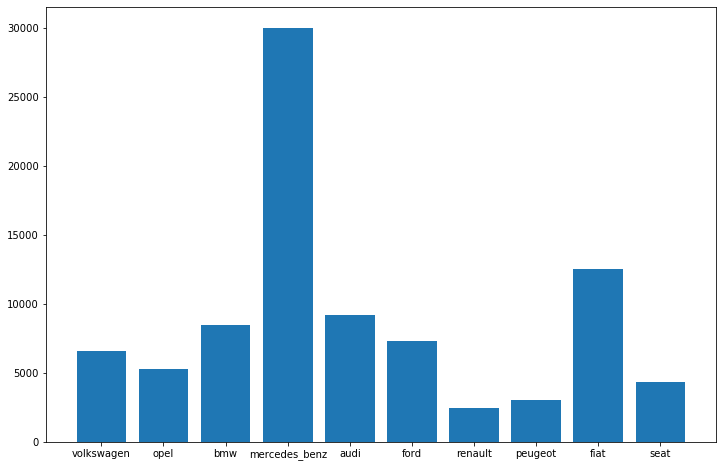

In [338]:
plt.figure(figsize=(12,8))
plt.bar(list(top_10_brand_mean_price.keys()), list(top_10_brand_mean_price.values()))


In [333]:
list(top_10_brand_mean_price.keys())

['volkswagen',
 'opel',
 'bmw',
 'mercedes_benz',
 'audi',
 'ford',
 'renault',
 'peugeot',
 'fiat',
 'seat']

In [335]:
list(top_10_brand_mean_price.values())

[6599.051842537963,
 5283.132247063281,
 8493.857251184834,
 30025.703202235116,
 9212.9306621881,
 7305.141843971631,
 2431.195698924731,
 3065.611888111888,
 12566.541567695962,
 4315.744565217391]